# Table of Contents.
* [1-Description.](#section-one)
* [2-Importing libraries.](#section-two)
* [3-Overview of data.](#section-three)
* [4-Dealing with missing values.](#section-four)
* [5-Creating new features.](#section-five)
* [6-Data Visualization.](#section-six)
* [7-Predictions with XGB classifier.](#section-seven)

<a id="section-one"></a>
# 1-Description

<div class="alert alert-block alert-info">
The Titanic was a British luxury passenger liner that tragically sank on its maiden voyage in 1912. It was considered one of the largest and most luxurious ships of its time, often dubbed the "unsinkable" ship. The ship set sail from Southampton, England, on April 10, 1912, bound for New York City.

On the night of April 14, the Titanic struck an iceberg in the North Atlantic Ocean. The collision caused extensive damage to the ship's hull, leading to the flooding of several compartments. Despite the crew's efforts to save the ship, the overwhelming amount of water eventually caused the Titanic to break apart and sink into the icy waters.

The disaster resulted in the loss of over 1,500 lives, making it one of the deadliest peacetime maritime disasters in history.

The total number of passengers aboard the Titanic is estimated to have been around 2,224. This number includes both passengers and crew members. The ship had a maximum capacity of approximately 3,547 people, but it was not fully occupied on its maiden voyage.

This dataset is a sample of the total passengers and crew members on the ship. It is common in data analysis and machine learning to work with representative samples rather than the entire population.
<div/>

# Objective : Titanic Survival Prediction.

<a id="section-two"></a>
# 2-Importing libraries.

In [230]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import style
import seaborn as sns
sns.set_style("white")
import plotly.express as px

#metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,  cross_val_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

<a id="section-three"></a>
# 3-Overview of data.

In [231]:
train=pd.read_csv("train (2).csv")
test=pd.read_csv("test (2).csv")
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [232]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Columns description;
* 'PassengerId': A unique identifier assigned to each passenger.
* 'Survived': Indicates whether the passenger survived the Titanic disaster (0 = No, 1 = Yes).
* 'Pclass': Represents the passenger's ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
* 'Name': The name of the passenger.
* 'Sex': Specifies the gender of the passenger (male or female).
* 'Age': The age of the passenger in years.
* 'SibSp': Indicates the number of siblings or spouses aboard the Titanic.
* 'Parch': Represents the number of parents or children aboard the Titanic.
* 'Ticket': The ticket number of the passenger.
* 'Fare': The amount of money paid for the ticket fare.
* 'Cabin': Denotes the cabin number of the passenger (where available).
* 'Embarked': Indicates the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


In [233]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [235]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [236]:
print("Number of unique values in 'age' column:", train["Age"].nunique())
print("Number of unique values in 'Cabin' column:", train["Cabin"].nunique())
print("Number of unique values in 'PassengerId' column:", train["PassengerId"].nunique())
print("Number of unique values in 'Name' column:", train["Name"].nunique())
print("Number of unique values in 'Ticket' column:", train["Ticket"].nunique())
print("Number of unique values in 'Fare' column:", train["Fare"].nunique())


Number of unique values in 'age' column: 88
Number of unique values in 'Cabin' column: 147
Number of unique values in 'PassengerId' column: 891
Number of unique values in 'Name' column: 891
Number of unique values in 'Ticket' column: 681
Number of unique values in 'Fare' column: 248


In [237]:
print("Pclass: ", train["Pclass"].unique())
print("Sex: ", train["Sex"].unique())
print("SibSp: ", train["SibSp"].unique())
print("Parch: ", train["Parch"].unique())
print("Embarked: ", train["Embarked"].unique())

Pclass:  [3 1 2]
Sex:  ['male' 'female']
SibSp:  [1 0 3 4 2 5 8]
Parch:  [0 1 2 5 3 4 6]
Embarked:  ['S' 'C' 'Q' nan]


<a id="section-four"></a>
# 4-Dealing with missing values

In [238]:
print("Missing values in train Dataset.")
print(train.isnull().sum())
print('-'*20)
print("Missing values in test Dataset.")
print(test.isnull().sum())


Missing values in train Dataset.
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
Missing values in test Dataset.
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### Almost 80% of the data in column `Cabin` is missing, So, i'm going to remove this column

In [239]:
# removing column Cabin
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

In [240]:
# filling two missing values in Embarked with mode(train data) and fare with mean(test_data).
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Fare"].fillna(test["Fare"].mean(), inplace=True)

#### `Age` is an important column. So, we're gonna fill missing values in this column. we'll perform regression imputation to fill the missing values in the `Age` column using other variables as predictors:

In [241]:
# filling the missing values in age column with LR model(train data).
df_train = train.dropna(subset=['Age'])

# Selecting the predictor variables
predictors = ['Pclass', 'SibSp', 'Parch']

# Creating X and y
X = df_train[predictors]
y = df_train['Age']
# defining a model
regressor = LinearRegression()

# Fitting the model
regressor.fit(X, y)

# Using the trained model to predict missing ages
df_missing = train[train['Age'].isnull()]
X_missing = df_missing[predictors]
predicted_ages = regressor.predict(X_missing)

# Filling the missing values with the predicted ages
train.loc[train['Age'].isnull(), 'Age'] = predicted_ages

In [242]:
# filling the missing values in age column with LR model(test data).
df_test = test.dropna(subset=['Age'])

# Selecting the predictor variables
predictors = ['Pclass', 'SibSp', 'Parch']

# Creating X and y
X = df_test[predictors]
y = df_test['Age']
# defining a model
regressor = LinearRegression()

# Fitting the model
regressor.fit(X, y)

# Using the trained model to predict missing ages
df_missing = test[test['Age'].isnull()]
X_missing = df_missing[predictors]
predicted_ages = regressor.predict(X_missing)

# Filling the missing values with the predicted ages
test.loc[test['Age'].isnull(), 'Age'] = predicted_ages

In [243]:
print("Missing values in train Dataset.")
print(train.isnull().sum())
print('-'*20)
print("Missing values in test Dataset.")
print(test.isnull().sum())

Missing values in train Dataset.
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------
Missing values in test Dataset.
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**So, we've cleared missing values.Now we're good to go ahead**

<a id="section-five"></a>
# 5-Creating new features.

In [244]:
#creating a column "Total Family" by adding "SibSp" and "Parch" column.
train["Tot-Family"]=train["SibSp"]+train["Parch"]+1
test["Tot-Family"]=test["SibSp"]+test["Parch"]+1

In [245]:
# creating a column conntaining info whether person was boarding alone or not.
train["Isalone"]=train["Tot-Family"].apply(lambda x:1 if x==1 else 0)
test["Isalone"]=test["Tot-Family"].apply(lambda x:1 if x==1 else 0)

In [246]:
# creating age bins
#train data
train['AgeCategory'] = 'Unknown'

# Update the 'AgeCategory' column based on age ranges
train.loc[(train['Age'] > 1) & (train['Age'] <= 5), 'AgeCategory'] = 'Infant'
train.loc[(train['Age'] > 5) & (train['Age'] < 12), 'AgeCategory'] = 'Child'
train.loc[(train['Age'] >= 12) & (train['Age'] < 19), 'AgeCategory'] = 'Teen'
train.loc[(train['Age'] >= 19) & (train['Age'] < 39), 'AgeCategory'] = 'Young'
train.loc[(train['Age'] >= 39) & (train['Age'] < 59), 'AgeCategory'] = 'Adult'
train.loc[train['Age'] >= 59, 'AgeCategory'] = '60+'

#test data
test['AgeCategory'] = 'Unknown'

# Update the 'AgeCategory' column based on age ranges
test.loc[(train['Age'] > 1) & (test['Age'] <= 5), 'AgeCategory'] = 'Infant'
test.loc[(train['Age'] > 5) & (test['Age'] < 12), 'AgeCategory'] = 'Child'
test.loc[(train['Age'] >= 12) & (test['Age'] < 19), 'AgeCategory'] = 'Teen'
test.loc[(train['Age'] >= 19) & (test['Age'] < 39), 'AgeCategory'] = 'Young'
test.loc[(train['Age'] >= 39) & (test['Age'] < 59), 'AgeCategory'] = 'Adult'
test.loc[train['Age'] >= 59, 'AgeCategory'] = '60+'

In [247]:
# Defining the fare categories and labels
fare_bins = [-1, 0, 100, 200, 300, 400, 513]  # Adjust the bin ranges as needed
fare_labels = ['Free', 'Very Low', 'Low', 'Medium', 'High', 'Very High']

# Categorizing the Fare column into fare groups
train['FareCategory'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)
test['FareCategory'] = pd.cut(test['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

In [248]:
# Extracting courtesy titles from Name column from train data.
train["Title"]=train["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
stat_min=10
title_names = (train['Title'].value_counts() < stat_min) #this will create a true false series with title name as index
train['Title'] = train['Title'].apply(lambda x: 'miscellanous' if title_names.loc[x] == True else x)
# Extracting courtesy titles from Name column from test data.
test["Title"]=test["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
stat_min=10
title_names = (test['Title'].value_counts() < stat_min) #this will create a true false series with title name as index
test['Title'] = test['Title'].apply(lambda x: 'miscellanous' if title_names.loc[x] == True else x)
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'miscellanous'], dtype=object)

In [249]:
len(train["Title"])

891

<a id="section-six"></a>
# 6-Data Visualization

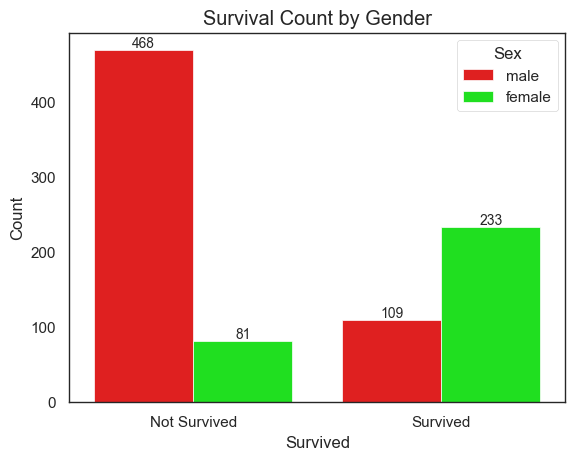

In [250]:
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF']
ax=sns.countplot(x="Survived", data=train, hue="Sex", palette=colors)
# Add count labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Adjust plot aesthetics
ax.set_xticklabels(["Not Survived", "Survived"])
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Count by Gender")

# Display the plot
plt.show()

* The plot above shows that ratio of `females survival` was more than `males`.
* This means, females were given priority over males in the rescue operation.

In [251]:
# Group the data by 'Survived' and 'Sex' columns and count the occurrences
grouped_data = train.groupby(['AgeCategory','Survived']).size().reset_index(name='Count')

custom_color_palette = ['#1f77b4', '#ff7f0e']
# Create the treemap using plotly express
fig = px.treemap(grouped_data, path=['AgeCategory', 'Survived'], values='Count', color='Survived',
                 color_discrete_sequence=custom_color_palette)
fig.show()

The plot above shows that almost:
* 63% of Infants survived.
* 33% of children survived.
* 41% of teenagers survived.
* 36% of young people survived.
* 38% of adults survived.
* 22% of 60+ aged people survived.
* and ages of 21 persons is still unknown.

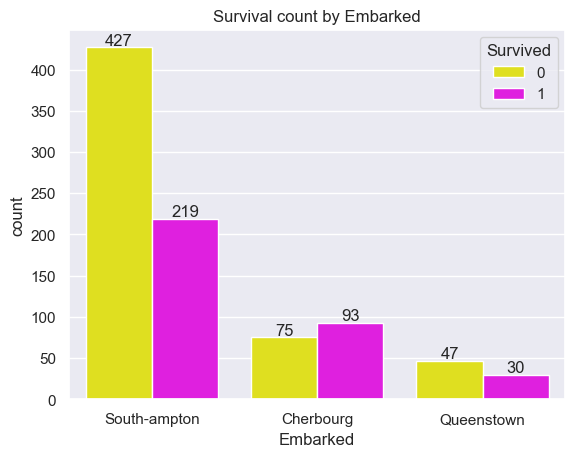

In [252]:
sns.set(style="darkgrid")
colors = ['#FFFF00', '#FF00FF']  # Specify your desired colors
ax = sns.countplot(x="Embarked", data=train, hue="Survived", palette=colors)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords='offset points')

ax.set_xticklabels(["South-ampton", "Cherbourg", "Queenstown"])
plt.title("Survival count by Embarked")
plt.show()



The plot above shows that almost 644 Passengers Embarked from Southampton,168 Embarked from from Cherbourg and 77 Embarked from Queenstown (now known as Cobh).
* 33% from Southampton survived.
* 55% from Cherbourg survived.
* 38% from Queenstown (now known as Cobh) survived


#### well this question may also rose in your mind that why most of the passengers Embarked from these three ports.
* Southampton: Southampton, located on the south coast of England, was the port of departure for the Titanic. It was the ship's starting point for its maiden voyage to New York.

* Cherbourg: Cherbourg, situated on the northwestern coast of France, was the Titanic's first stop after leaving Southampton. The ship docked in Cherbourg to pick up additional passengers. Cherbourg served as a convenient port for travelers from France and other parts of Europe who wanted to board the Titanic.

* Queenstown (Cobh): Queenstown, now known as Cobh, is located in County Cork, Ireland. It was the Titanic's last port of call before heading across the Atlantic. Queenstown was primarily an embarkation point for third-class passengers, many of whom were Irish immigrants seeking a new life in America.


Text(0.5, 1.0, 'Categorizing people into Pclasses Embarked from different ports')

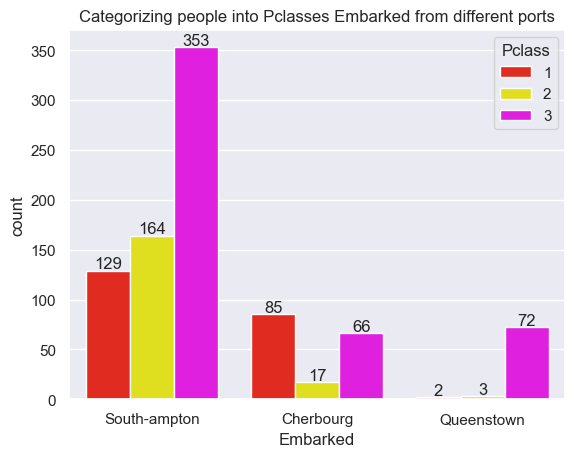

In [253]:
colors = ['#FF0F00', '#FFFF00', '#FF00FF']
ax=sns.countplot(x="Embarked", data=train, hue="Pclass", palette=colors)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords='offset points')
    
ax.set_xticklabels(["South-ampton", "Cherbourg", "Queenstown"])
plt.title("Categorizing people into Pclasses Embarked from different ports")

**As mentioned above... *Queenstown was primarily an embarkation point for third-class passenger*, I just wanna confirm that point and as expected most of passengers from `Queenstown port` were traveling in `3rd class` only `3 individual`s in `2nd class` and an even smaller number, `2 individuals`, in `1st class`.**

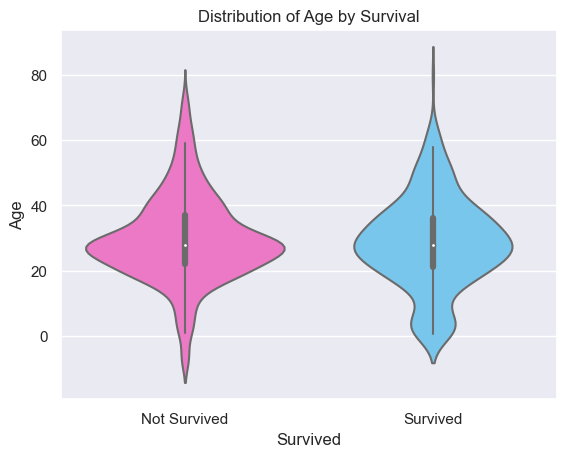

In [254]:
palette = ['#FF66CC', '#66CCFF', '#FF00CC', '#CC66FF', '#9966FF', '#6699FF', '#66CCFF', '#66FFFF']
a=sns.violinplot(train, x="Survived", y="Age", palette=palette)
a.set_xticklabels(["Not Survived", "Survived"])
plt.title('Distribution of Age by Survival')
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Goldschmidt, Mr. George B'),
  Text(1, 0, 'Connors, Mr. Patrick'),
  Text(2, 0, 'Artagaveytia, Mr. Ramon'),
  Text(3, 0, 'Barkworth, Mr. Algernon Henry Wilson'),
  Text(4, 0, 'Mitchell, Mr. Henry Michael'),
  Text(5, 0, 'Crosby, Capt. Edward Gifford'),
  Text(6, 0, 'Svensson, Mr. Johan')])

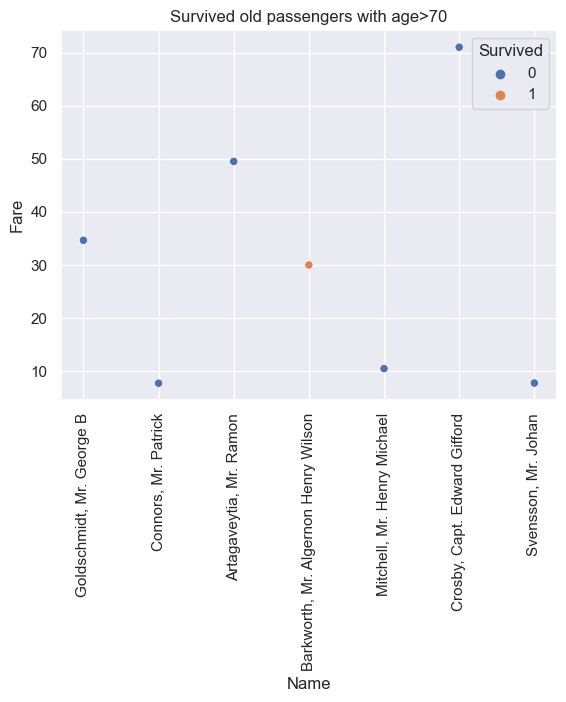

In [255]:
olds=train[train["Age"]>=70].head(7)
sns.scatterplot(olds, x="Name", y="Fare", hue="Survived")
plt.title("Survived old passengers with age>70")
plt.xticks(rotation=90)


**There were only seven very old passengers with age greater than 70 and they were travelling in third class.Only one of them "Barkworth, Mr. Algernon Henry Wilson" survived.**

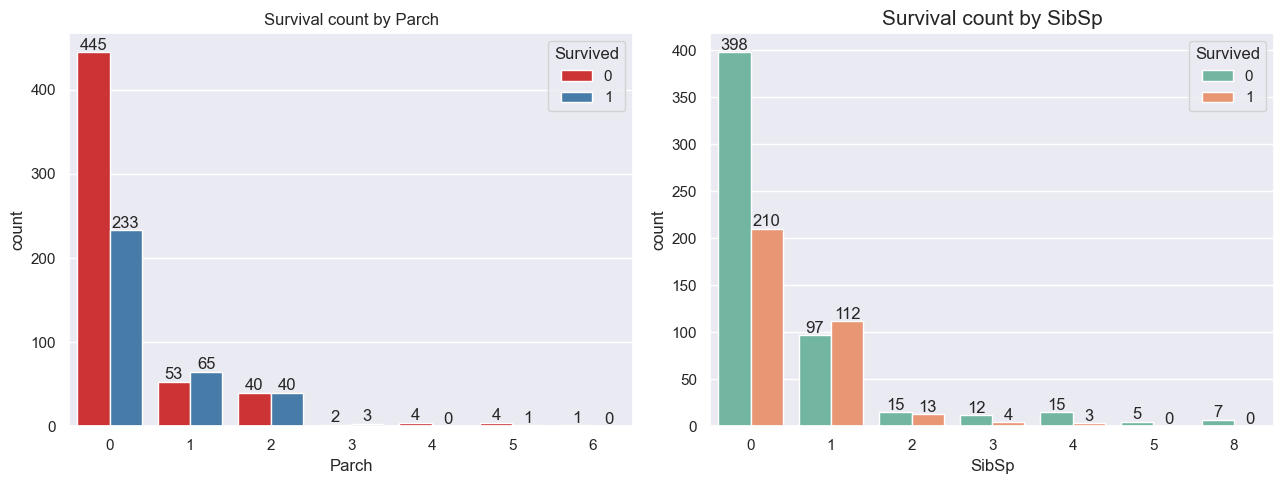

In [256]:
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 2)
plt.title("Survival count by SibSp", size=15)
plot=sns.countplot(x="SibSp", data=train, hue="Survived", palette="Set2")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords='offset points')


plt.subplot(1, 2, 1)
plt.title("Survival count by Parch")
plot=sns.countplot(x="Parch", data=train, hue="Survived", palette="Set1")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords='offset points')


plt.tight_layout()



**Now we're gonna play with `Fare` column.**

In [257]:
print(train["Fare"].min())
print(train["Fare"].max())

0.0
512.3292


**It means 3 people were paying `512$` fair which was maximum.**

The `Fare` column is in float datatype format.So, I'm going to convert it into integer datatype for convenience.

In [258]:
#Converting fare column values into  integers.
train["Fare"]=train["Fare"].astype(int)

Text(0.5, 1.0, 'Survival count by Fare Category')

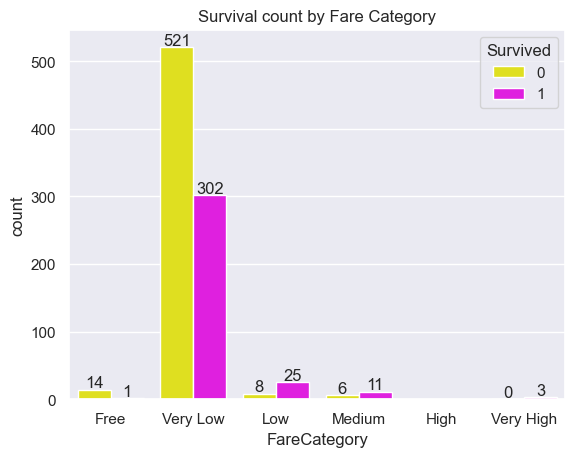

In [259]:
# adding color palette
colors = ['#FFFF00', '#FF00FF']
ax=sns.countplot(x="FareCategory", data=train, palette=colors, hue="Survived")
# let's annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords='offset points')
plt.title("Survival count by Fare Category")

**The above plot shows the survival ratio was directly proportional to the fare.**

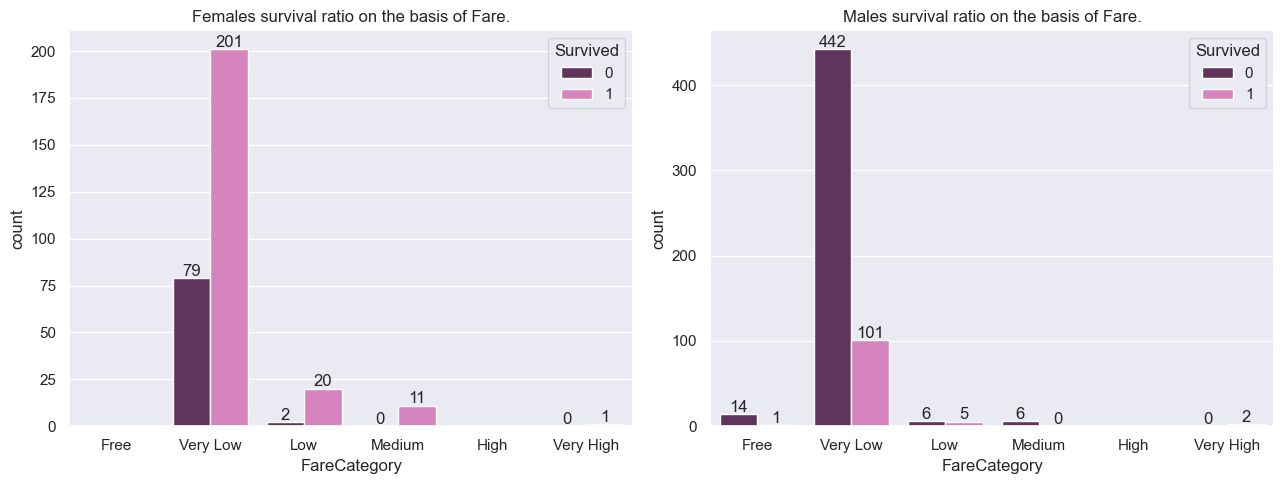

In [260]:
# survived passengers
males = train[train["Sex"] == "male"]
# unsurvived passengers
females = train[train["Sex"] == "female"]

palette = ['#682d63', '#e377c2']

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 2)
plot = sns.countplot(data=males, x="FareCategory", hue="Survived", palette=palette)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha="center", va="center", xytext=(0, 5), textcoords='offset points')

plt.title("Males survival ratio on the basis of Fare.")

plt.subplot(1, 2, 1)
plot = sns.countplot(data=females, x="FareCategory", hue="Survived", palette=palette)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha="center", va="center", xytext=(0, 5), textcoords='offset points')

plt.title("Females survival ratio on the basis of Fare.")
plt.tight_layout()


Summary of above plots;
* Most of the females survived paying fare from low to medium.Only one female passenger was paying very high fare and she survived.
* Males survival ratio was very less. Male passengers travelling free almost all of them didn't survive except one. 2 male-passengers paying v.high fair, survived.

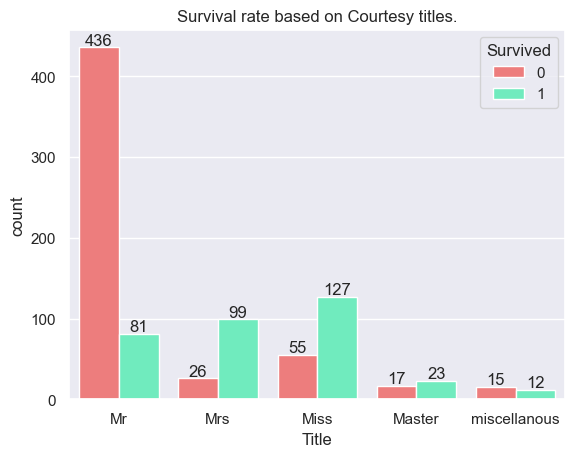

In [261]:
# color palette
palette = ["#FF6B6B", "#5CFFC4"]

# Plotting the countplot
plot=sns.countplot(x="Title", data=train, hue="Survived", palette=palette)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha="center", va="center", xytext=(0, 5), textcoords='offset points')  
                                 
plt.title("Survival rate based on Courtesy titles.")
# Display the plot
plt.show()




Based on the data presented in the plot:
* The survival rate of passengers with the title "Miss" was 69%.
* The survival rate of passengers with the title "Mrss" was 79%.
* The survival rate of passengers with the title "Mr" was 15%.
* The survival rate of passengers with the title "Master" was 57%.
* The 44% of miscellanous passengers survived.

<a id="section-seven"></a>
#  Predictions with XGB classifier

In [262]:
#encoding categorical train data
label = LabelEncoder()
for x in train:    
    train['Sex_Code'] = label.fit_transform(train['Sex'])
    train['Embarked_Code'] = label.fit_transform(train['Embarked'])
    train['Title_Code'] = label.fit_transform(train['Title'])
    train['AgeBin_Code'] = label.fit_transform(train['AgeCategory'])
    train['FareBin_Code'] = label.fit_transform(train['FareCategory'])
    
#encoding categorical test data
label = LabelEncoder()
for x in test:    
    test['Sex_Code'] = label.fit_transform(test['Sex'])
    test['Embarked_Code'] = label.fit_transform(test['Embarked'])
    test['Title_Code'] = label.fit_transform(test['Title'])
    test['AgeBin_Code'] = label.fit_transform(test['AgeCategory'])
    test['FareBin_Code'] = label.fit_transform(test['FareCategory'])

### Correlation matrix and survival correlation

In [263]:
# making an interactive correlation plot of whole dataset
correlation_matrix = train.corr(numeric_only=True)

fig = px.imshow(correlation_matrix, color_continuous_scale='YlGnBu')
fig.update_layout(
    height=600,
    width=800
)
fig.show()


In [264]:
train1 = ["Sex_Code", "Fare","Parch", "SibSp", "Embarked_Code", "Title_Code", "AgeBin_Code",  "Pclass", "Tot-Family", "Isalone"]

Target=["Survived"]
for x in train1:
    if train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(train[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        
print(pd.crosstab(train['Title'],train[Target[0]]))
        

Survival Correlation by: Sex_Code
   Sex_Code  Survived
0         0  0.742038
1         1  0.188908
---------- 

Survival Correlation by: Fare
    Fare  Survived
0      0  0.066667
1      4  0.000000
2      5  0.000000
3      6  0.090909
4      7  0.234742
..   ...       ...
86   227  0.750000
87   247  0.500000
88   262  1.000000
89   263  0.500000
90   512  1.000000

[91 rows x 2 columns]
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Embarked_Code
   Embarked_Code  Survived
0              0  0.553571
1              1  0.389610
2              2  0.339009
---------- 

Survival Correlation by: Title_Code
   Ti

In [265]:
# Preparing the features and target
features = train.drop(["Sex", "Age", "Survived", "Ticket", "Name", "Fare", "SibSp", "Parch", "AgeCategory", "FareCategory", "Title", "Embarked"], axis=1)
target = train['Survived']

In [266]:
features.head()

,PassengerId,Pclass,Tot-Family,Isalone,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,1,3,2,0,1,2,2,6,4
1,2,1,2,0,0,0,3,6,4
2,3,3,1,1,0,2,1,6,4
3,4,1,2,0,0,2,3,6,4
4,5,3,1,1,1,2,2,6,4


In [267]:
features.columns

Index(['PassengerId', 'Pclass', 'Tot-Family', 'Isalone', 'Sex_Code',
       'Embarked_Code', 'Title_Code', 'AgeBin_Code', 'FareBin_Code'],
      dtype='object')

In [268]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Tot-Family', 'Isalone',
       'AgeCategory', 'FareCategory', 'Title', 'Sex_Code', 'Embarked_Code',
       'Title_Code', 'AgeBin_Code', 'FareBin_Code'],
      dtype='object')

In [269]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Performing upsampling using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initializing the XGBClassifier
xgb_classifier = XGBClassifier()

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator from grid search
best_xgb_classifier = grid_search.best_estimator_

# cross-validation
cv_scores = cross_val_score(best_xgb_classifier, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Fitting the final model on the entire training data
best_xgb_classifier.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [270]:
acc_xgb = round(best_xgb_classifier.score(X_train_resampled, y_train_resampled) * 100, 2)
acc_xgb

91.1

In [271]:
# Make predictions on the X_test data
y_pred = best_xgb_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8603351955307262


In [275]:
# Dropping unnecessary columns from the test DataFrame and equalizing the features as present in train data.
features_to_drop = ["Sex", "Age", "Ticket", "Name", "Fare", "SibSp", "Parch", "AgeCategory", "FareCategory", "Title", "Embarked"]
features = test.drop(features_to_drop, axis=1)

# X_test is the DataFrame containing the selected features
X_test = features

test_ids = test['PassengerId']
predictions= best_xgb_classifier.predict(X_test)
output = pd.DataFrame({"PassengerId":test_ids.values, "Survived":predictions})
output.to_csv("test (2).csv")
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [273]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
